In [1]:
import os
import shutil
from EEG_utils.EEG_utils_MIT import *

In [2]:
num_points = 400

In [3]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\chbmit\\1.0.0\\"

patient_id = "chb01"
record_ids = ["03", "04", "15", "16", "18", "21", "26"]

# patient_id = "chb03"
# record_ids = ["01", "02", "03", "04", "34", "35", "36"]

# patient_id = "chb10"
# record_ids = ["12", "20", "27", "30", "31", "38", "89"]

In [4]:
list_lag_nodes = [5] # [1, 5, 10, 20, 50]
list_num_node_features = [10] # [3, 5, 10, 20, 30, 50]

top_k_edges = 4
corr_sec = 5

In [5]:
def sposta_file(cartella_origine, cartella_destinazione):
    # Controlla se la cartella di destinazione esiste, altrimenti la crea
    if not os.path.exists(cartella_destinazione):
        os.makedirs(cartella_destinazione)

    # Scorre tutti i file nella cartella di origine
    for elemento in os.listdir(cartella_origine):
        percorso_elemento = os.path.join(cartella_origine, elemento)
        
        # Verifica se l'elemento è un file e non una cartella
        if os.path.isfile(percorso_elemento):
            # Sposta il file nella cartella di destinazione
            shutil.move(percorso_elemento, cartella_destinazione)
            print(f"      File {elemento} spostato in {cartella_destinazione}")

  Distanza 5
   Node feature 10
     chb01_03
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb01\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:164: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 634
skip 1: 24


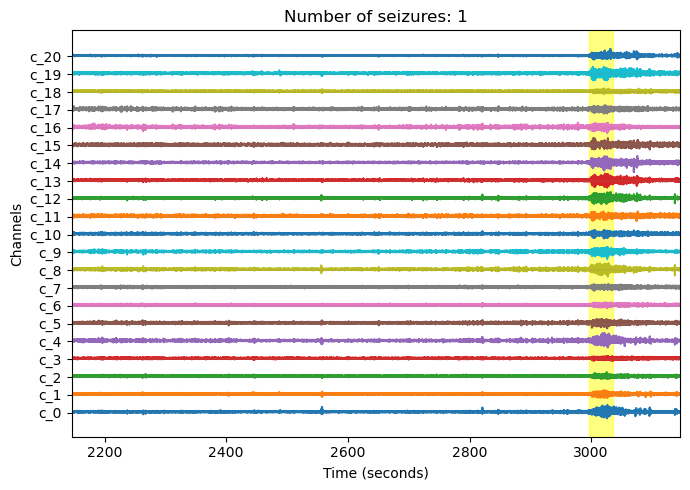

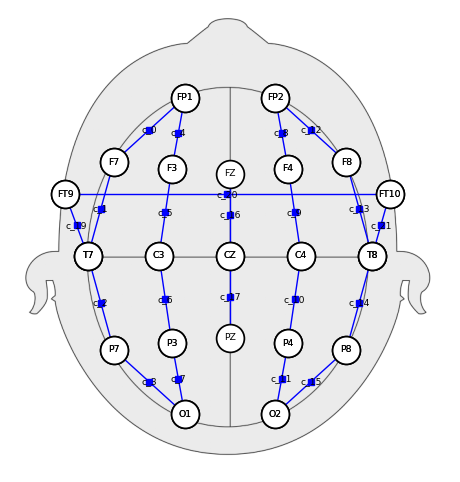

     chb01_04
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb01\chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:164: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 635
skip 1: 16


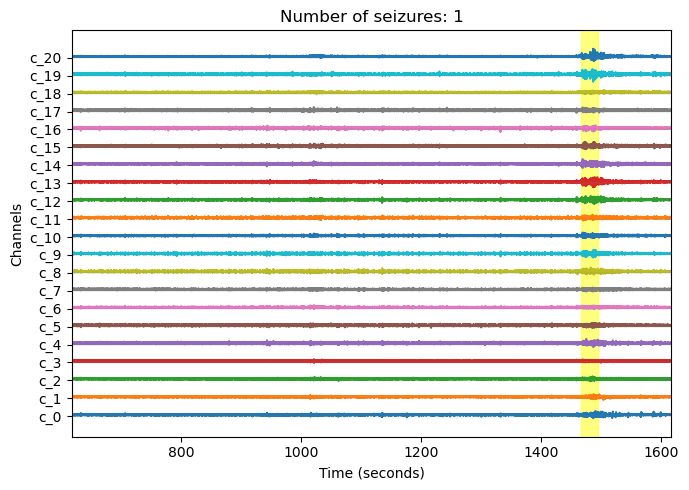

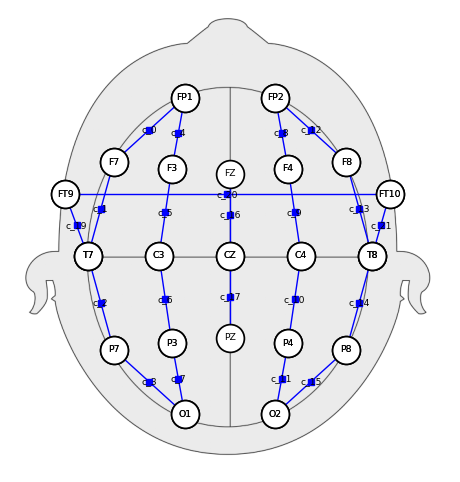

     chb01_15
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb01\chb01_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:164: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 634
skip 1: 24


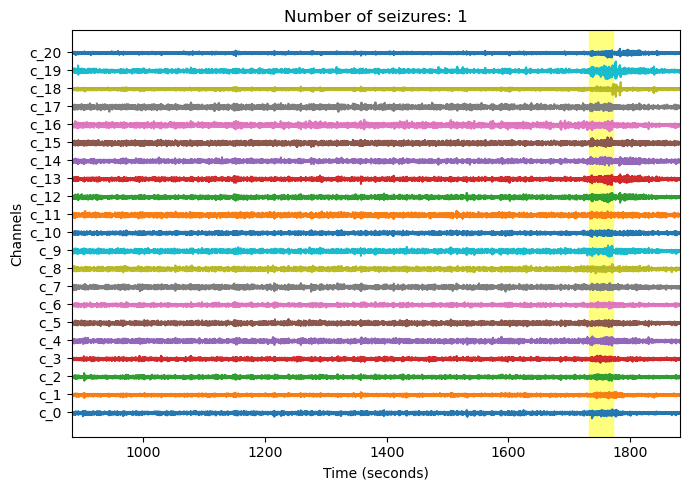

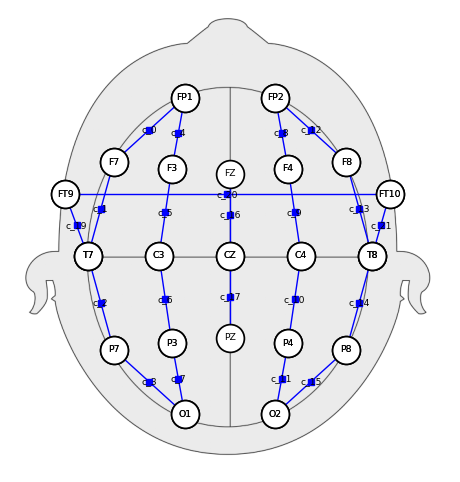

     chb01_16
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb01\chb01_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:164: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 634
skip 1: 31


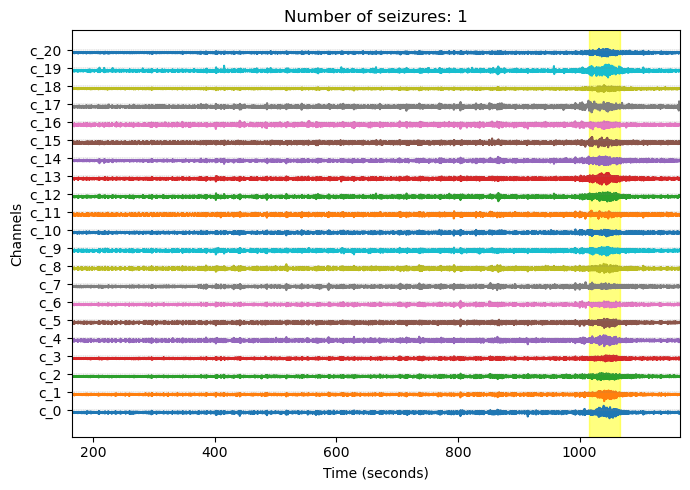

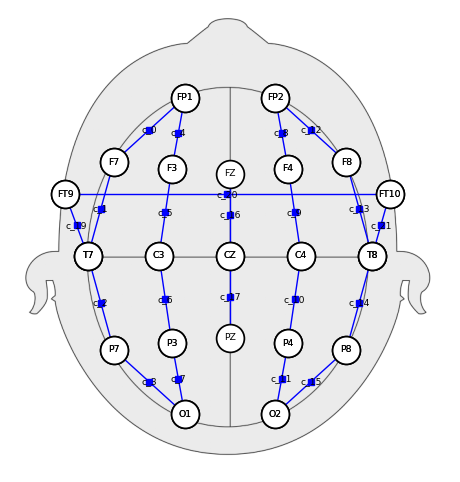

     chb01_18
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb01\chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:164: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 633
skip 1: 54


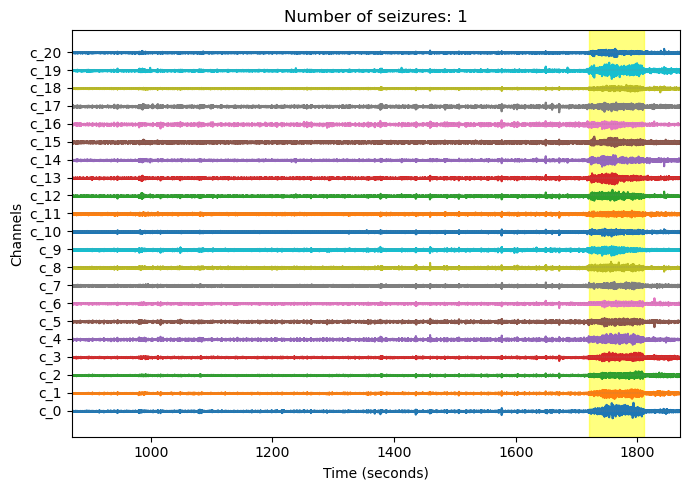

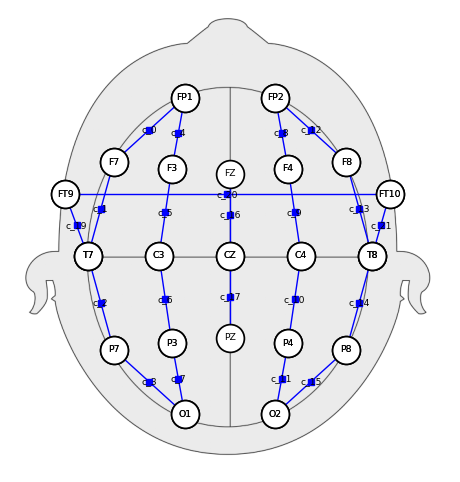

     chb01_21
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb01\chb01_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:164: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 298
skip 1: 56


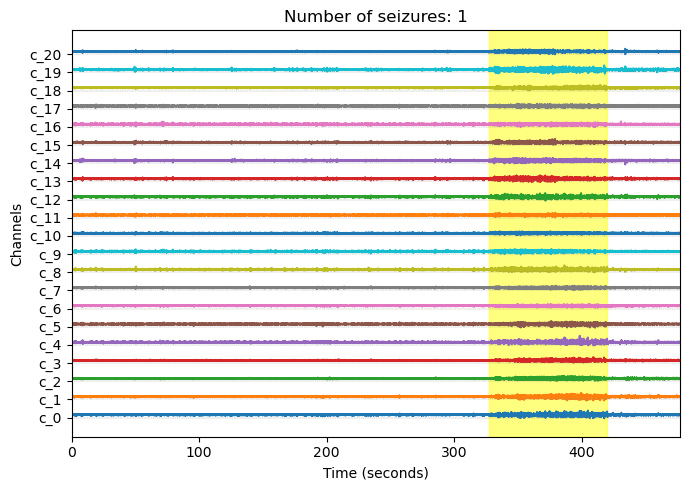

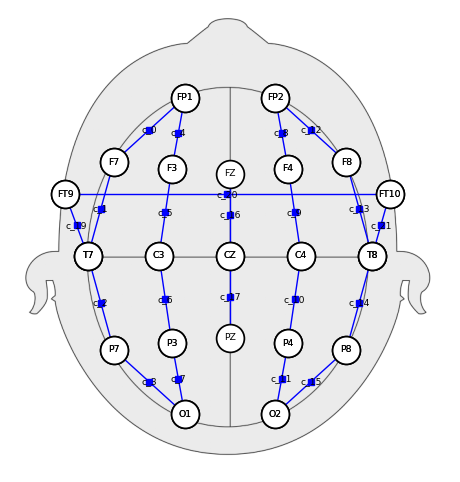

     chb01_26
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb01\chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:164: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 632
skip 1: 61


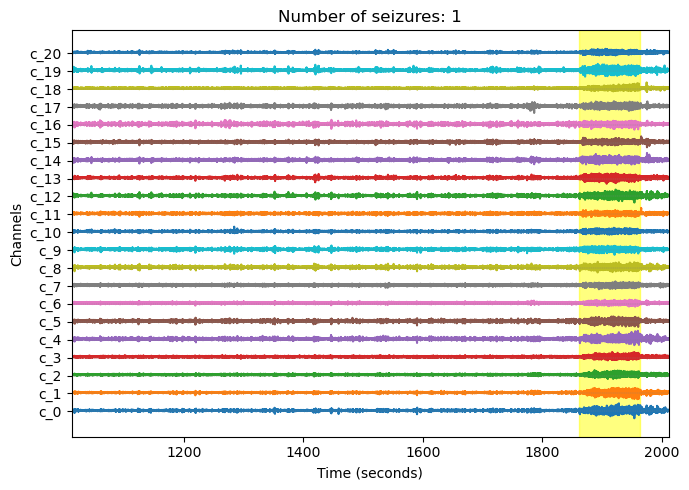

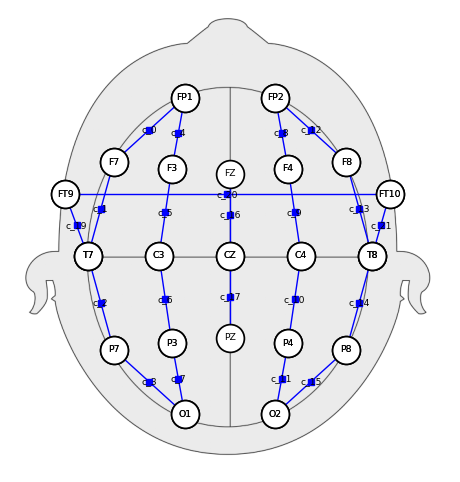

      File dataset_chb01_03.json spostato in EEG_data/Distanza 5/10 node feature
      File dataset_chb01_04.json spostato in EEG_data/Distanza 5/10 node feature
      File dataset_chb01_15.json spostato in EEG_data/Distanza 5/10 node feature
      File dataset_chb01_16.json spostato in EEG_data/Distanza 5/10 node feature
      File dataset_chb01_18.json spostato in EEG_data/Distanza 5/10 node feature
      File dataset_chb01_21.json spostato in EEG_data/Distanza 5/10 node feature
      File dataset_chb01_26.json spostato in EEG_data/Distanza 5/10 node feature
      File EEG_data_params_chb01_03.pkl spostato in EEG_data/Distanza 5/10 node feature
      File EEG_data_params_chb01_04.pkl spostato in EEG_data/Distanza 5/10 node feature
      File EEG_data_params_chb01_15.pkl spostato in EEG_data/Distanza 5/10 node feature
      File EEG_data_params_chb01_16.pkl spostato in EEG_data/Distanza 5/10 node feature
      File EEG_data_params_chb01_18.pkl spostato in EEG_data/Distanza 5/10 node f

In [6]:
for lag_nodes in list_lag_nodes:
    print(f"  Distanza {lag_nodes}")
    for num_node_features in list_num_node_features:
        print(f"   Node feature {num_node_features}")
        for record_id in record_ids:
            print(f"     {patient_id}_{record_id}")
            patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=num_node_features, lag_nodes=lag_nodes, top_k_edges=top_k_edges, corr_sec=corr_sec)
            patient.extract_seizure_info()
            patient.load_data()
            patient.plot_signals()
            patient.compute_indices()
            export_data_to_GRETEL(patient)
            export_coordinates(patient)
        sposta_file("EEG_data", f"EEG_data/Distanza {lag_nodes}/{num_node_features} node feature")
        print("-----------------------------")

# __________________________________________________________________________

In [7]:
import datetime

now = datetime.datetime.now()
print("Last full run:", now.strftime("%d/%m/%Y, ore %H:%M"))

Last full run: 02/07/2025, ore 13:59


In [8]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)